
# Analysis of TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This data set contains information about 10,000 movies collected from The Movie Database (TMDb) with columns as popularity, runtime in minutes, cast, genres etc.
Certain columns like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters. The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.






### Questions for Analysis

* Do the audience look out for certain actors in a movie and/or movies directed by certain directors and/or production companies which could directly have an impact on the revenue generated?
 
* Does high budget means high revenue?

* Will people get bored after watching a movie with a long runtime which could lead to poor/low revenue?

* Does high popularity results from high revenue or high budget?

* Will high revenue or high budget lead to high gross/loss ?


In [1]:
#importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('seaborn')
import seaborn as sns
pd.set_option('display.max_columns', 25)

Loading the necessary modules for the analysis.

<a id='wrangling'></a>
## Data Wrangling

In [2]:
#reading the csv file
movies = pd.read_csv('tmdb-movies.csv')

Reading in the dataset with the pandas function read_csv into rows and columns.

In [3]:
display(movies.head())
print('\n')
display(movies.tail())

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,surfer|surfboard|surfing,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,car race|racing|formula 1,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,car|trolley|stealing car,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,spoof,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,fire|gun|drive|sacrifice|flashlight,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


Display the first 5 rows and the last 5 rows of the dataset to get familiarized with the dataset

In [4]:
movies.shape

(10866, 21)

The dataset has 10866 rows and 21 columns.

In [5]:
movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


A summary statistics of the dataset shows that the minimum values for budget, revenue and runtime are weird because movies can't have zero budgetsand definitely can't have zero runtime.

### Data Cleaning

In [6]:
#filtering off movies with zero budget and revenue
movies = movies[(movies['budget'] != 0) & (movies['revenue'] != 0) & (movies['runtime'] != 0)]

filtering off the rows with zero budget, zero revenue and zero runtime

In [7]:
#checking for NaN
movies.isnull().sum()

id                         0
imdb_id                    0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       4
homepage                2429
director                   1
tagline                  280
keywords                 138
overview                   0
runtime                    0
genres                     0
production_companies      46
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Checking for NaN/missing values which returned true for some columns.

In [8]:
#dropping NaN
movies.dropna(inplace=True)

Removing the missing values/NaN.

In [9]:
#check for NaN
movies.isna().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

Checking for NaN after dropping them which returned none.

In [10]:
#check for duplicates
movies.duplicated().sum()

0

Checking for duplicates which returned none

In [11]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 0 to 10760
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1287 non-null   int64  
 1   imdb_id               1287 non-null   object 
 2   popularity            1287 non-null   float64
 3   budget                1287 non-null   int64  
 4   revenue               1287 non-null   int64  
 5   original_title        1287 non-null   object 
 6   cast                  1287 non-null   object 
 7   homepage              1287 non-null   object 
 8   director              1287 non-null   object 
 9   tagline               1287 non-null   object 
 10  keywords              1287 non-null   object 
 11  overview              1287 non-null   object 
 12  runtime               1287 non-null   int64  
 13  genres                1287 non-null   object 
 14  production_companies  1287 non-null   object 
 15  release_date        

A summary of the dataset to get information about the datatypes and numbers of non-null values of the dataset

In [12]:
#removing columns not necessarily important for this analysis
movies.drop(columns=['id', 'imdb_id', 'budget', 'revenue', 'homepage', 'tagline', 'keywords', 'overview'], inplace=True, axis=1)

Removing columns such as id, imdb_id, budget, revenue, homepage, tagline, keywords and overview which are deem irrelevant to the analysis. Budget and revenue are also dropped because working with the adjusted values will produce a better analysis and comparable result.

In [13]:
#parsing the release_date
movies['release_date'] = pd.to_datetime(movies['release_date'])

Parsing the release date to the correct date time format using pandas to_datetime function.

In [14]:
display(movies.head())
print('\n')
display(movies.tail())

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10595,1.549139,Live and Let Die,Roger Moore|Yaphet Kotto|Jane Seymour|Clifton ...,Guy Hamilton,121,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM),1973-07-05,293,6.1,1973,3.437812e+07,7.945168e+08
10689,1.910465,Thunderball,Sean Connery|Claudine Auger|Adolfo Celi|Lucian...,Terence Young,130,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM),2065-12-16,331,6.3,1965,7.612620e+07,9.771535e+08
10724,1.778746,On Her Majesty's Secret Service,George Lazenby|Diana Rigg|Telly Savalas|Gabrie...,Peter R. Hunt,142,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM)|Danjaq,2069-12-12,258,6.4,1969,4.160985e+07,4.872780e+08
10759,1.198849,Halloween,Donald Pleasence|Jamie Lee Curtis|P.J. Soles|N...,John Carpenter,91,Horror|Thriller,Compass International Pictures|Falcon Internat...,1978-10-25,522,7.3,1978,1.002810e+06,2.339890e+08
10760,1.157930,Animal House,John Belushi|Tim Matheson|John Vernon|Verna Bl...,John Landis,109,Comedy,Universal Pictures|Oregon Film Factory|Stage I...,1978-07-27,230,6.7,1978,9.025292e+06,4.713208e+08


The first 5 rows and last 5 rows of the cleaned dataset.

<a id='eda'></a>
## Exploratory Data Analysis

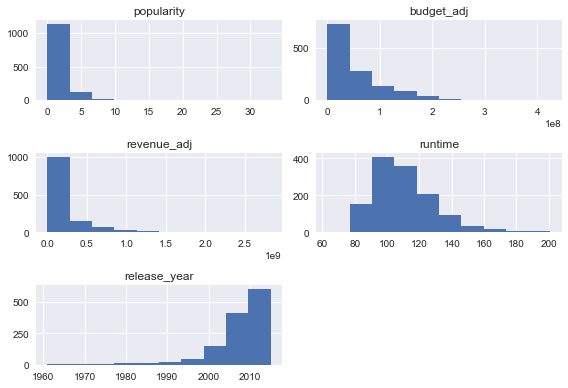

In [15]:
#histogram of the numerical variables
hist_cols = ['popularity', 'budget_adj', 'revenue_adj', 'runtime', 'release_year']
movies[hist_cols].hist()
plt.tight_layout()

* The distribution curve for popularity is right-skewed. Most movies in the cleaned dataset have popularity that lies between 0 and 10.
* Budget_adj distribution is right-skewed and the range is between 100 and 200 million dollars.
* Revenue_adj has a right-skewed distribution curve with a range between 900 million and 1.2 billion dollars.
* Most movies have a runtime between 80-150 minutes.
* Most of the movies in the cleaned dataset are produced between 1980 and 2012.

### Does high budget means high revenue?

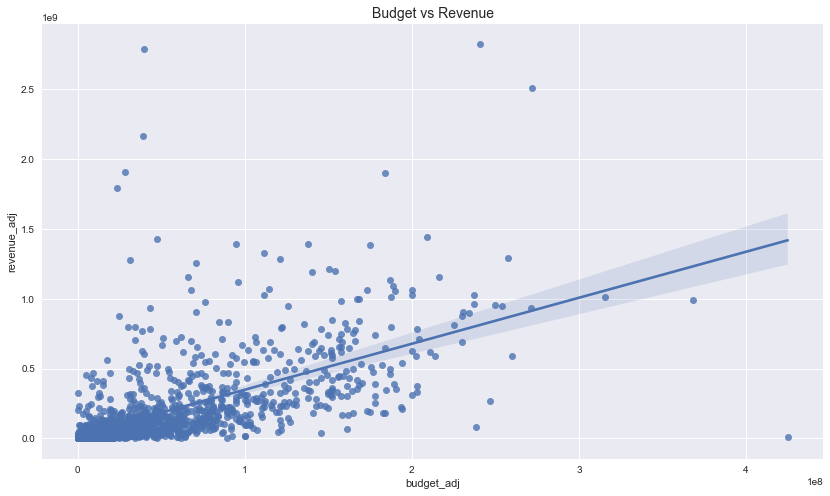

In [16]:
#regression plot between revenue and budget
plt.figure(figsize=(14,8))
sns.regplot(x=movies['budget_adj'], y=movies['revenue_adj'])
plt.title('Budget vs Revenue', fontsize=14)
plt.show()

There seems to be a good correlation between budget and revenue.

In [17]:
#finding correlation between budget and revenue mathematically
budget_revenue_corr = movies[['budget_adj', 'revenue_adj']].corr()
budget_revenue_corr

,budget_adj,revenue_adj
budget_adj,1.000000,0.613093
revenue_adj,0.613093,1.000000


Mathematical correlation between budget and revenue.

### Will people get bored after watching a movie with a long runtime which could lead to poor/low revenue?

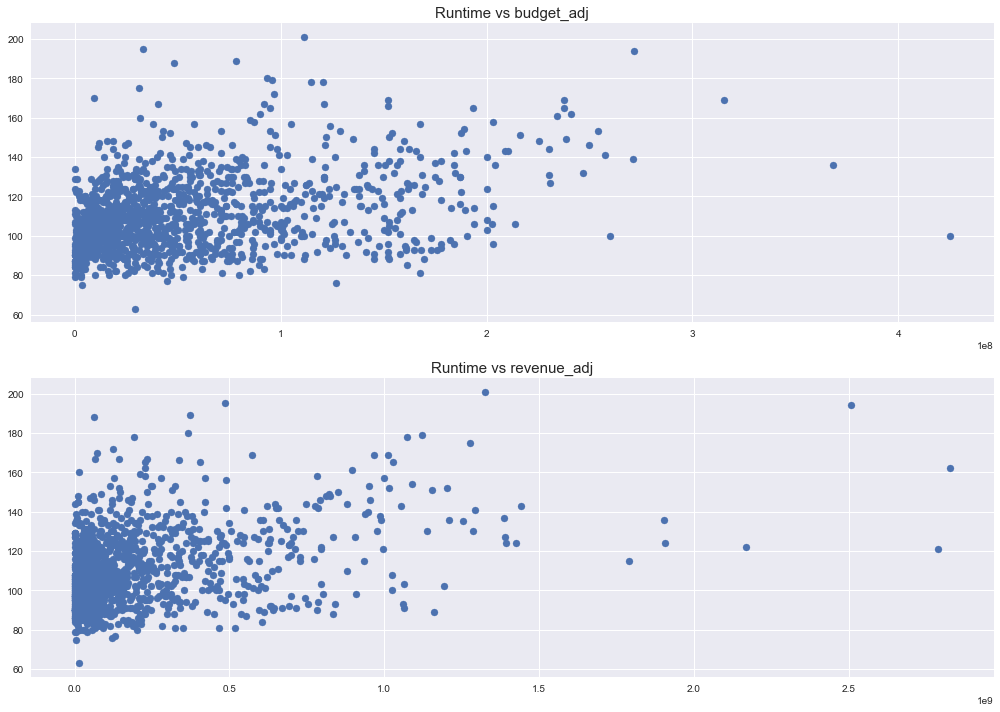

In [18]:
#relationship between runtime, budget and revenue
plt.figure(figsize=(14,10))
plt.subplot(2,1,1)
plt.scatter(x=movies['budget_adj'], y=movies.runtime)
plt.title('Runtime vs budget_adj', fontsize=15)


plt.subplot(2,1,2)
plt.scatter(x=movies['revenue_adj'], y=movies.runtime)
plt.title('Runtime vs revenue_adj', fontsize=15)

plt.tight_layout()
plt.show()

There isn't an obvious relationship between runtime and budget also between runtime and revenue.

In [19]:
#mathematical relationship between runtime, budget and revenue
runtime_corr = movies[['runtime', 'budget_adj', 'revenue_adj']].corr()
runtime_corr

,runtime,budget_adj,revenue_adj
runtime,1.000000,0.361985,0.371980
budget_adj,0.361985,1.000000,0.613093
revenue_adj,0.371980,0.613093,1.000000


A table to show the correlation value between runtime, budget and revenue.

### Does high popularity results from high revenue or high budget?

In [20]:
#top 10 movies with the highest popularity
movies_pop = movies.groupby('original_title').mean()[['popularity']].sort_values('popularity', ascending=False)
movies_pop[:10]

,popularity
original_title,
Jurassic World,32.985763
Mad Max: Fury Road,28.419936
Interstellar,24.949134
Guardians of the Galaxy,14.311205
Insurgent,13.112507
Captain America: The Winter Soldier,12.971027
Star Wars,12.037933
John Wick,11.422751
Star Wars: The Force Awakens,11.173104


Top 10 movies with the highest popularity in the cleaned dataset.

In [21]:
#top 10 movies with the lowest popularity
movies_pop[-10:]

,popularity
original_title,
Sleep Dealer,0.086287
Stonewall,0.076109
Tsotsi,0.075624
Secretariat,0.063240
Katy Perry: Part of Me,0.050524
The Internship,0.040858
Boy,0.028456
Expelled: No Intelligence Allowed,0.021371
The In Crowd,0.015997


Top 10 movies with the lowest popularity in the cleaned dataset.

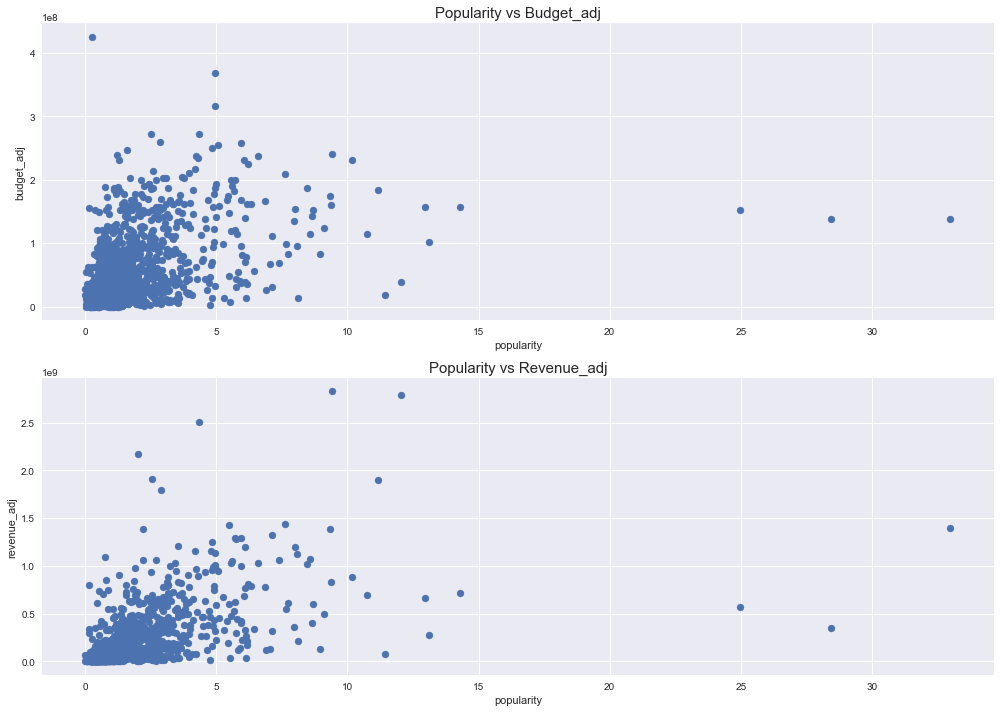

In [22]:
#relationship between popularity, budget and revenue
plt.figure(figsize=(14,10))

plt.subplot(2,1,1)
plt.scatter(x=movies['popularity'], y=movies['budget_adj'])
plt.xlabel('popularity')
plt.ylabel('budget_adj')
plt.title('Popularity vs Budget_adj', fontsize=15)

plt.subplot(2,1,2)
plt.scatter(x=movies['popularity'], y=movies['revenue_adj'])
plt.xlabel('popularity')
plt.ylabel('revenue_adj')
plt.title('Popularity vs Revenue_adj', fontsize=15)

plt.tight_layout()
plt.show()

Relationship between popularity and budget is low but the relationship between popularity and revenue looks moderate.

In [23]:
#mathematical relationship between popularity, budget and revenue
pop_rev_bud_corr = movies[['popularity','budget_adj','revenue_adj']].corr()
pop_rev_bud_corr

,popularity,budget_adj,revenue_adj
popularity,1.000000,0.419863,0.549299
budget_adj,0.419863,1.000000,0.613093
revenue_adj,0.549299,0.613093,1.000000


A table displaying the mathematical correlation between popularity, budget_adj and revenue_adj.

### Will high revenue or high budget lead to high gross/loss ?

In [24]:
#top 10 movies with the highest revenue
movies_high_revenue = movies.groupby('original_title').mean()[['revenue_adj']].sort_values('revenue_adj', ascending=False)[:10]
movies_high_revenue

,revenue_adj
original_title,
Avatar,2.827124e+09
Star Wars,2.789712e+09
Titanic,2.506406e+09
The Exorcist,2.167325e+09
Jaws,1.907006e+09
Star Wars: The Force Awakens,1.902723e+09
E.T. the Extra-Terrestrial,1.791694e+09
The Avengers,1.443191e+09
The Empire Strikes Back,1.424626e+09


Top 10 movies with the highest revenue in the cleaned dataset.

In [25]:
#top 10 movies with the highest budget
movies_high_budget = movies.groupby('original_title').mean()[['budget_adj']].sort_values('budget_adj', ascending=False)[:10]
movies_high_budget

,budget_adj
original_title,
The Warrior's Way,4.250000e+08
Pirates of the Caribbean: On Stranger Tides,3.683713e+08
Pirates of the Caribbean: At World's End,3.155006e+08
Titanic,2.716921e+08
Spider-Man 3,2.713305e+08
Tangled,2.600000e+08
Avengers: Age of Ultron,2.575999e+08
Harry Potter and the Half-Blood Prince,2.541001e+08
Harry Potter and the Deathly Hallows: Part 1,2.500000e+08


Top 10 movies with the highest budget in the cleaned dataset.

In [26]:
#calculating gross\loss for each movie
movies['gross_adj'] = movies['revenue_adj'] - movies['budget_adj']
movies.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,gross_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


Creating a column called gross_adj to get the gross/loss for each movie in the cleaned dataset which is a difference between the revenue_adj and budget_adj and displaying the first 5 rows.

In [27]:
#top 10 movies with the highest gross
movies_gross_loss = movies.groupby('original_title').mean()[['gross_adj']].sort_values('gross_adj', ascending=False)
movies_gross_loss[:10]

,gross_adj
original_title,
Star Wars,2.750137e+09
Avatar,2.586237e+09
Titanic,2.234714e+09
The Exorcist,2.128036e+09
Jaws,1.878643e+09
E.T. the Extra-Terrestrial,1.767968e+09
Star Wars: The Force Awakens,1.718723e+09
The Empire Strikes Back,1.376998e+09
Jurassic Park,1.293767e+09


Top 10 movies with the highest gross in the cleaned dataset.

In [28]:
#top 10 movies with the highest loss
movies_gross_loss[-10:]

,gross_adj
original_title,
R.I.P.D.,-6.397928e+07
How Do You Know,-7.133109e+07
Osmosis Jones,-7.561717e+07
Soldier,-8.083977e+07
A Sound of Thunder,-8.263725e+07
Sphere,-8.280335e+07
Flushed Away,-9.144505e+07
Mars Needs Moms,-1.076102e+08
The Lone Ranger,-1.551102e+08


Top 10 movies with the highest loss in the cleaned dataset.

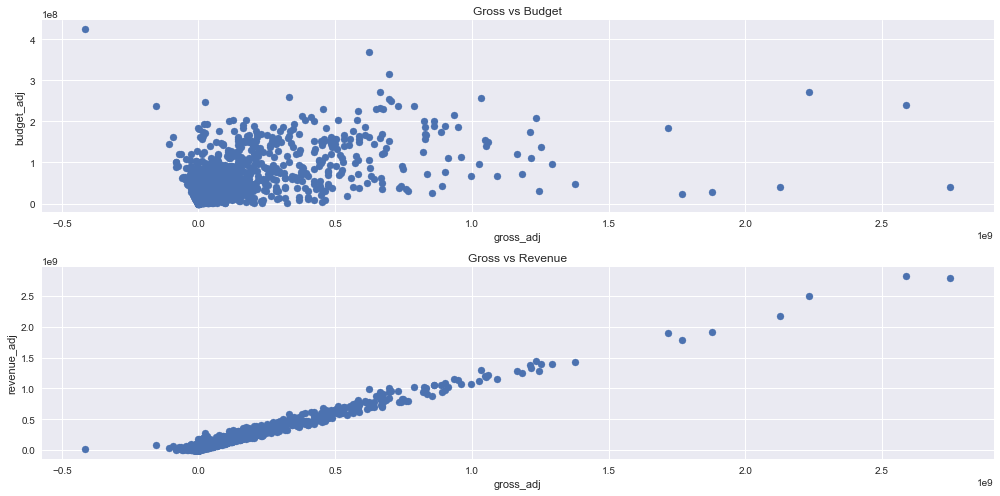

In [29]:
#scatter plots of gross_adj between budget_adj and revenue_adj
plt.figure(figsize=(14,7))

plt.subplot(2,1,1)
plt.scatter(x=movies['gross_adj'], y=movies['budget_adj'])
plt.ylabel('budget_adj')
plt.xlabel('gross_adj')
plt.title('Gross vs Budget')

plt.subplot(2,1,2)
plt.scatter(x=movies['gross_adj'], y=movies['revenue_adj'])
plt.ylabel('revenue_adj')
plt.xlabel('gross_adj')
plt.title('Gross vs Revenue')

plt.tight_layout()
plt.show()

There is a poor/low correlation between gross and budget but there is a good/high correlation between gross and revenue.

In [30]:
#mathematical value to express the correlation between gross, budget and revenue
gross_bud_rev_corr = movies[['budget_adj', 'revenue_adj', 'gross_adj']].corr()
gross_bud_rev_corr

,budget_adj,revenue_adj,gross_adj
budget_adj,1.000000,0.613093,0.475453
revenue_adj,0.613093,1.000000,0.986502
gross_adj,0.475453,0.986502,1.000000


A mathematical representation of the correlation between budget_adj, revenue_adj and gross_adj.

### Do the audience look out for certain actors in a movie and/or movies directed by certain directors and/or production companies which could directly have an impact on the revenue generated?

In [31]:
def groups_barplot(df, column_1, column_2='popularity', column_3='budget_adj', column_4='revenue_adj'):
    '''a function to return a top 10 grouped column in ascending order and visualize it through a a horizontal barplot'''
    column_df = df.loc[:, [column_1, column_2, column_3, column_4]]
    column_df[column_1] = column_df[column_1].str.split('|')
    column_df = column_df.explode(column_1)
    column_grp_rev = column_df.groupby(column_1).mean().sort_values(['revenue_adj'])
    column_grp_pop = column_df.groupby(column_1).mean().sort_values(['popularity'])
    column_grp_bud = column_df.groupby(column_1).mean().sort_values(['budget_adj'])
    
    plt.figure(figsize=(14,8))
    plt.subplot(3,1,1)
    column_grp_rev[column_4][-10:].plot(kind='barh', fontsize=13, color='red')
    plt.title('TOP 10 ' + column_1.upper() + ' RANKED ON REVENUE')
    
    plt.subplot(3,1,2)
    column_grp_pop[column_2][-10:].plot(kind='barh', fontsize=13, color='green')
    plt.title('TOP 10 ' + column_1.upper() + ' RANKED ON POPULARITY')
    
    plt.subplot(3,1,3)
    column_grp_bud[column_3][-10:].plot(kind='barh', fontsize=13, color='blue')
    plt.title('TOP 10 ' + column_1.upper() + ' RANKED ON BUDGET')
    
    plt.tight_layout()
    plt.show()

A function to create a grouped dataframe based on a desired column and plot a horizontal barplot to visualize the categorical variables involved.

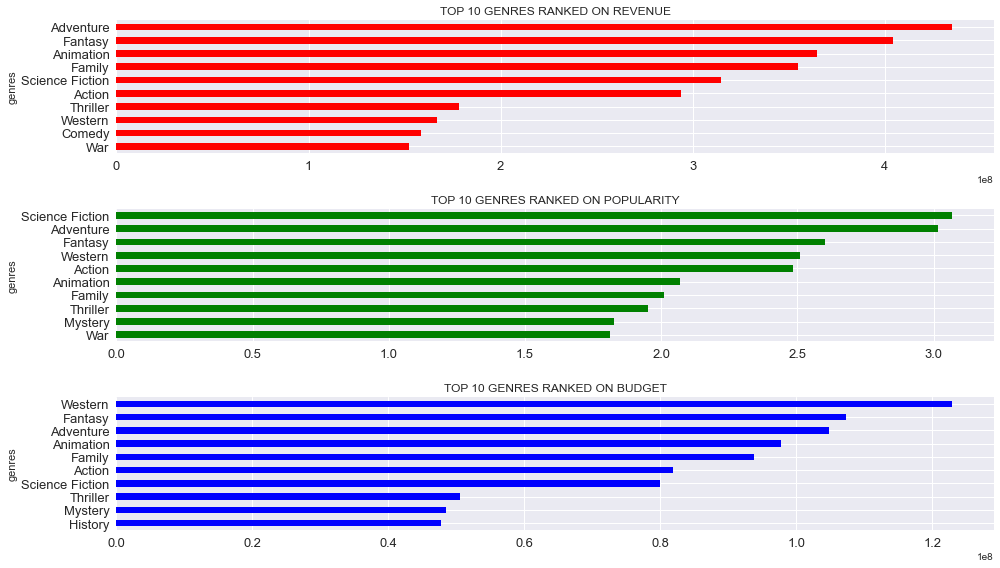

In [32]:
#creating a dataframe grouped by genres based on popularity, budget and revenue and visualization with barplots
groups_barplot(movies, 'genres')

A horizontal barplot showing the top 10 genres ranked on revenue, popularity and budget.

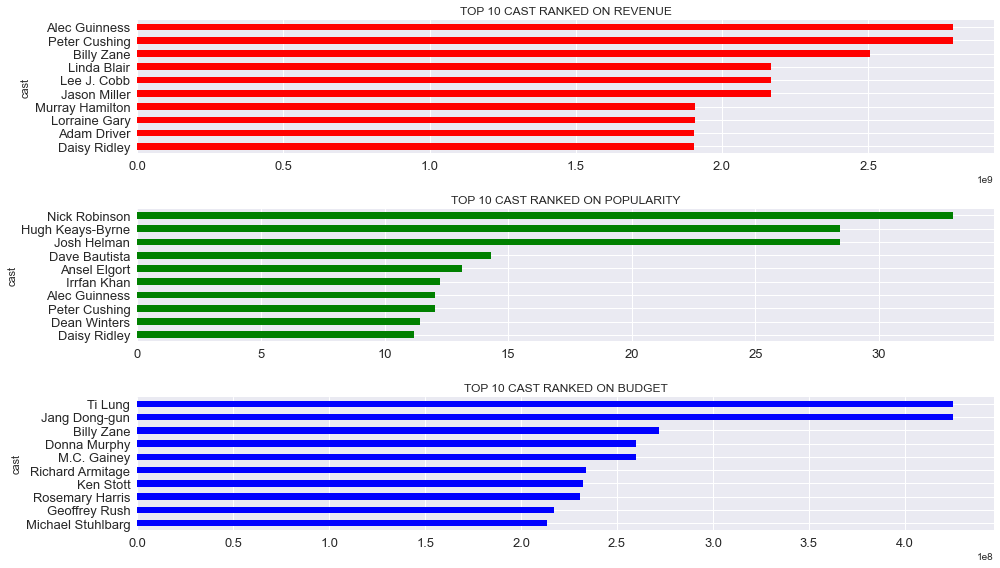

In [33]:
#creating a dataframe grouped by cast based on popularity, budget and revenue and visualization with barplots
groups_barplot(movies, 'cast')

A horizontal barplot showing the top 10 cast ranked on revenue, popularity and budget.

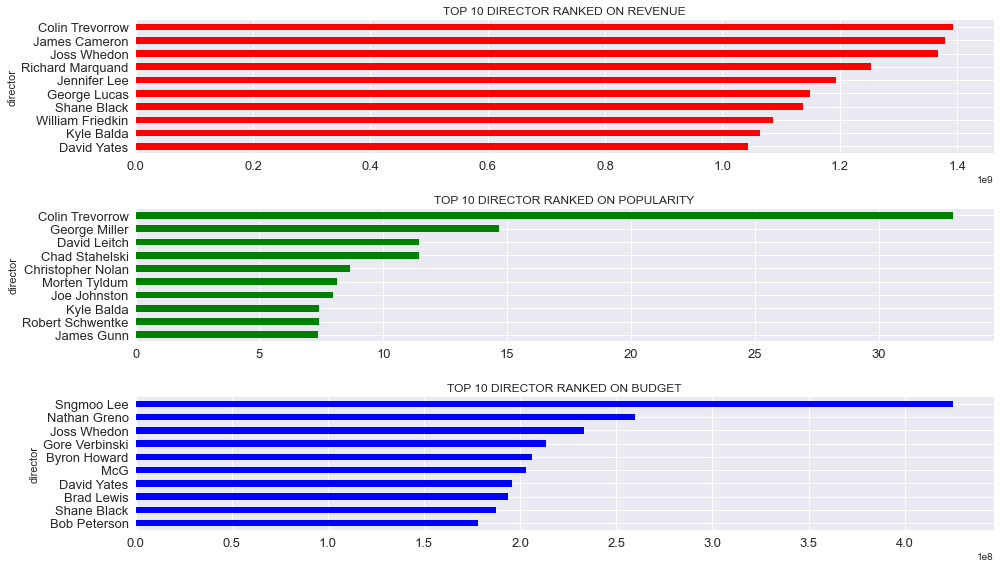

In [34]:
#creating a dataframe grouped by director based on popularity, budget and revenue with barplots
groups_barplot(movies, 'director')

A horizontal barplot showing the top 10 directors ranked on revenue, popularity and budget.

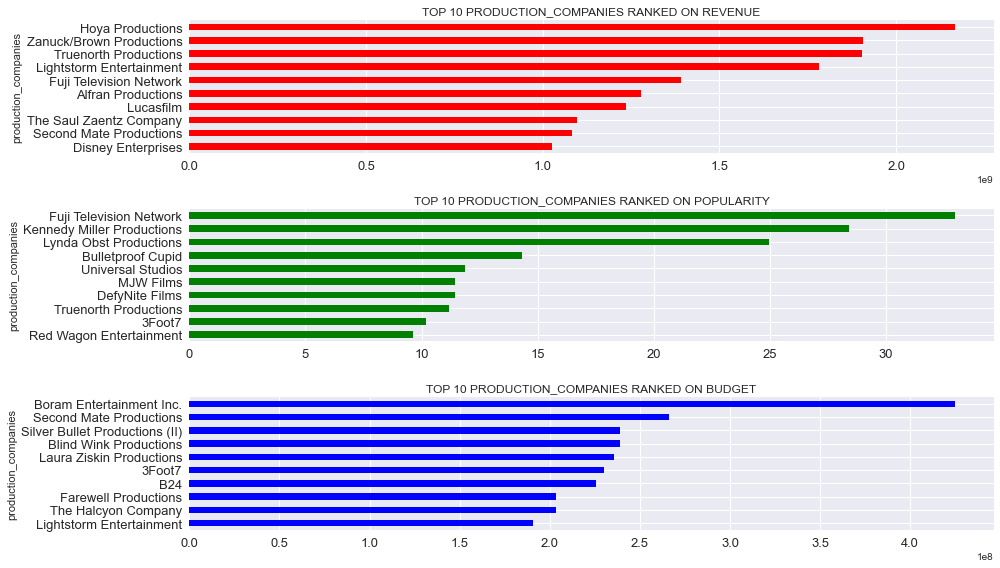

In [35]:
#creating a dataframe grouped by production companies based on popularity, budget and revenue with barplots
groups_barplot(movies, 'production_companies')

A horizontal barplot showing the top 10 production companies ranked on revenue, popularity and budget.

<a id='conclusions'></a>
## Conclusions

* High revenue tends to lead to high gross because 9 movies which are **Star Wars, Avatar, Titanic, The Exorcist, Jaws, Star Wars: The Force Awaken, E.T. the Extra Terrestial, The Empire Strikes Back and Jurassic World** are both in the top 10 movies for revenue and also in top 10 movies with the highest gross. Only one movie: **Titanic** appears in the top 10 movies for highest budget, in the top 10 movies for highest revenue and also in top 10 movies with the highest gross. None of the other 9 movies in the top 10 movies with the highest budget which are: **The Warrior's Way, Pirates of the Caribbean: On Stranger Tides, Pirates of the Caribbean: At World's End, Titanic, Spider-Man 3, Tangled, Avengers: Age of Ultron, Harry Potter and the Half-Blood Prince, Harry Potter and the Deathly Hallows: Part 1 and John Carter** appeared in the top 10 movies with the highest revenue and highest gross. High budget does not necessarily mean high revenue because the movie: The **Warrior's Way** was in the top 10 movies with the highest budget but also in the top 10 movies for the highest loss.

* Runtime of movies doesn't have any effect on the revenue a movie can generate neither on the budget of the movie. 

* 3 movies out of the top 10 movies with the highest popularity which are **Jurassic World, Star Wars and Star Wars: The Force Awaken** are also in the top 10 movies with the highest revenue and highest gross but none appeared in the top 10 movies for the highest budget. None of the movies in the top 10 movies with the lowest popularity appeared in the top 10 movies in highest revenue, budget, gross and loss. Movies with high popularity tends to have high revenue and vice versa.

* Movies themed as **adventure, fanstasy or animation** have generated more revenue than others. Movies with a genre of either **science fiction, adventure and fantasy** have more popularity than others while it cost more to produce movies with a genre of **western, fantasy and adventure**. Looks like a movie with a genre combination of **adventure and fantasy** will generate more revenue and have more popularity but it will cost more to produce them.

* None of the top 10 cast ranked on budget appeared in the top 10 cast ranked on revenue and popularity. 3 cast: **Alec Guinness, Peter Cushing and Daisy Ridley** appeared both in top 10 cast ranked on revenue and popularity. Seems like audience do look out for certain actors in movies which could indirectly generate more revenue, hence a high popularity at a low budget apparently but it is plausible.

* 2 directors: **Colin Trevorrow and Kyle Balda** appeared both in the top 10 directors ranked by revenue and popularity while 3 directors: **Joss Whedon, David Yates and Shane Black** appeared both in the top 10 directors ranked on revenue and budget but none was in the top 10 directors ranked on popularity. 7 out of the directors ranked on budget weren't in the top 10 directors ranked on revenue and popularity. Looks like **Colin Trevorrow and Kyle Balda** will do a good job of directing a movie that will generate a high revenue also more popularity while employing **David Yates, Shane Black and Joss Whedon** will come at a cost but high revenue can be expected.

* Two production companies: **Truenorth productions and Fuji Television Network** were both in the top 10 production companies ranked on revenue and popularity. Also, 2 production companies: **Lightstorm Entertainment and Second Mate productions** appeared both in the top 10 production companies ranked on revenue and budget while one production company: **3Foot7** was in the top 10 production companies ranked in popularity and budget. Looks like movies handled by **Truenorth productions and Fuji Television Network** tends to generate revenue and high popularity while the ones produced by **Lightstorm Entertainment, Second Mate productions and 3Foot7** comes at a huge budget but a fair revenue can be expected.

### Limitations
* Some movies have more than one genres and directors.
* Lots of movies have zero budget or zero revenue recorded for them.
* Popularity is subjective.
* Span of the release year/date recorded for the movies are quite large.